<div style="background:#FFFFFF">
<img src="logo.jpg" width=150 ALIGN="left" style='margin-right:10px; border-style: solid; border-width: 2px;' alt='logo'>
<h1>Starting Kit - Living species Classification </h1>
<p>
This starting kit will guide you step by step and will walk you through the data statistics and<br>
examples. This will give you a clear idea of what this challenge is about and how you can<br>
proceed further to solve the challenge.
</p>

<br><br>
<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>
<p>
This code was tested with Python 3.8.5 |Anaconda custom (64-bit)| (default, Dec 23 2020, 21:19:02) (https://anaconda.org/)<br>
</p>
<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>
    
<p>
ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</p>

<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>
    <p>
This challenge was organized by <b>Team PACHAMAMA</b> at <b><a style='color: #62023C;' href='https://www.universite-paris-saclay.fr/'>Université Paris Saclay</a></b>
</p>
</div>

<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>

***
# Introduction

This challenge uses a Dataset introduced by  Maria-Elena Nilsback and Andrew Zissermanfor un the paper **Automated  flower  classification  over  a  largenumber  of  classes**,  
 
 
The dataset coniststs of total of 8,189 images belonging to 102 classes that  are  commonly  occuring  in  the  United  Kingdom. Some of the classes are the following:

    1. Buttercup
    2. Fire lily
    3. Azalea
    4. Gaura
    5. Garzania

    
This challenge is about creating a Machine Learning model and train it with the data provided to be able to identify and classify living species.

**References and credits:**    
 - Automated  flower  classificationover  a  large  number  of  classes (https://www.robots.ox.ac.uk/~vgg/publications/2008/Nilsback08/nilsback08.pdf) 
 - Université Paris Saclay (https://www.universite-paris-saclay.fr/)  
 - ChaLearn (http://www.chalearn.org/)  
***

### Imports

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [2]:
model_dir = 'sample_code_submission/' # Change the model to a better one once you have one!
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
# Uncomment the next lines to auto-reload libraries (this causes some problem with pickles in Python 3)
%load_ext autoreload
%autoreload 2
import seaborn as sns; sns.set()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
%reload_ext autoreload

***
# Step 1: Exploratory data analysis
We provide `sample_data` with the starting kit, but to prepare your submission, you must fetch the `public_data` from the challenge website and point to it.

The data used for this challenge has images resized into 128x128 pixels.

In [4]:
data_name = 'flower_challenge' # DO NOT CHANGE
#data_dir = 'sample_data'
data_dir = 'public_data' # Comment to use sample_data (You must download the public_data on CodaLab)
# !ls $data_dir*

### Load Data

In [5]:
from data_io import read_data
data, meta_data = read_data(data_dir)

###-------------------------------------###
### Checking Data
###-------------------------------------###


-------------------------------------
[+] Your dataset is in perfect format
-------------------------------------


###-------------------------------------###
### Loading Data
###-------------------------------------###


-------------------------------------
[+] Data loaded successfully
-------------------------------------


###-------------------------------------###
### Loading Images
###-------------------------------------###


-------------------------------------
[+] Images loaded successfully
-------------------------------------




### Data Statistics

In [6]:
print("Categories/Classes : ", data['categories'])
print("Number of images : ", data['images'].sum())
print("Train Images:", len(data['train_images']))
print("Test Images:", len(data['train_images']))

Categories/Classes :  ['Alpine Sea Holly' 'Anthurium' 'Artichoke' 'Azalea' 'Ball Moss'
 'Balloon Flower' 'Barbeton Daisy' 'Bearded Iris' 'Bee Balm'
 'Bird of Paradise' 'Bishop of Llandaff' 'Black-Eeyed Susan'
 'Blackberry Lily' 'Blanket Flower' 'Bolero Deep Blue' 'Bougainvillea'
 'Bromelia' 'Buttercup' 'Californian Poppy' 'Camellia' 'Canna Lily'
 'Canterbury Bells' 'Cape Flower' 'Carnation' 'Cautleya Spicata'
 'Clematis ' "Colt's Foot" 'Columbine' 'Common Dandelion' 'Corn Poppy'
 'Cyclamen' 'Daffodil' 'Desert-Rose' 'English Marigold' 'Fire Lily'
 'Foxglove' 'Frangipani' 'Fritillary' 'Garden Phlox' 'Gaura' 'Gazania'
 'Geranium' 'Giant White Arum Lily' 'Globe Thistle' 'Globe-Flower'
 'Grape Hyacinth' 'Great Masterwort' 'Hard-Leaved Pocket Orchid'
 'Hibiscus' 'Hippeastrum' 'Japanese Anemone' 'King Protea' 'Lenten Rose'
 'Lotus' 'Love in the Mist' 'Magnolia' 'Mallow' 'Marigold' 'Mexican Aster'
 'Mexican Petunia' 'Monkshood' 'Moon Orchid' 'Morning Glory'
 'Orange Dahlia' 'Osteospermum' 'Oxe

### Meta-Data

In [7]:
for key, value in meta_data.items():
    print(key, " : ", value)
    

dataset_name  :  flowers
dataset_description  :  flowers of 102 categories commonly occuring in the UK
total_categories  :  102
total_super_categorie  :  0
uniform_number_of_images_per_category  :  False
images_per_category  :  80
has_super_categories  :  False
image_column_name  :  FILE_NAME
category_column_name  :  CATEGORY
csv_with_tab  :  False


### Distribution of Classes/Labels

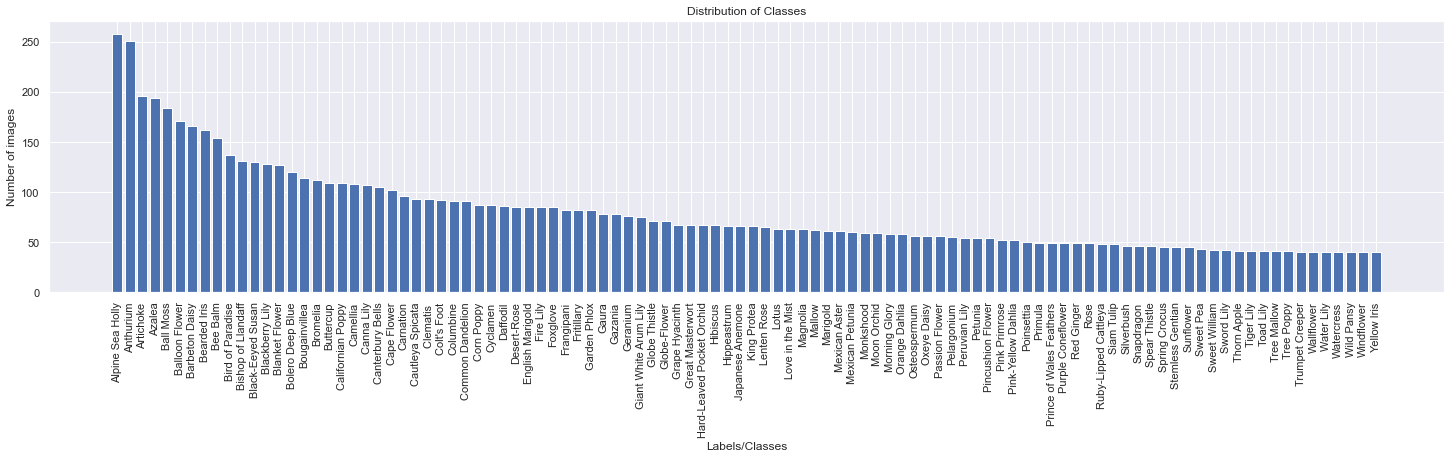

In [8]:
plt.figure(figsize=(25, 5))
plt.bar(data['categories'], data['images'])
plt.xlabel("Labels/Classes")
plt.ylabel("Number of images")
plt.xticks(rotation=90)
plt.title("Distribution of Classes");

### Visualization

In [9]:
data["train_labels"]

array(['Monkshood', 'Gazania', 'Tiger Lily', ..., 'Foxglove',
       'Watercress', 'Lotus'], dtype=object)

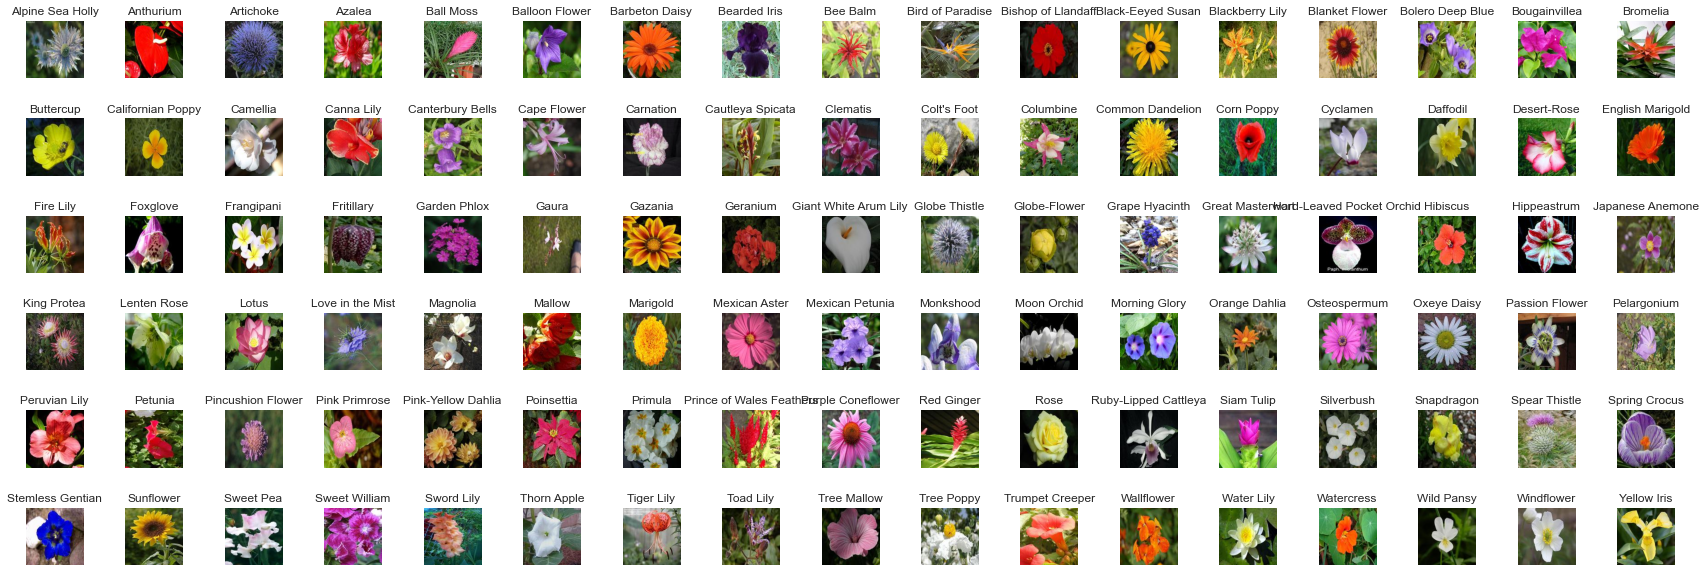

In [10]:
number_of_images_to_show = 102

images = data["train_images"]
labels = data["train_labels"]

fig, _axs = plt.subplots(nrows=6, ncols=17, figsize=(30,10))
fig.subplots_adjust(hspace=0.7)
axs = _axs.flatten()

df_labels = pd.Series(labels)

for i, cat in enumerate(data["categories"]):
    ind_cat = df_labels[df_labels == cat].index[0]
    img = images[ind_cat]
    label = labels[ind_cat]
    axs[i].set_title('{}'.format(label))
    axs[i].imshow(img)
    axs[i].set_axis_off()

plt.show()

### Scatter plots

In [11]:
def visualize_scatter(data_2d, label_ids, figsize=(20,20)):
    plt.figure(figsize=figsize)
    plt.grid()
    
    nb_classes = len(np.unique(label_ids))
    
    for label_id in np.unique(label_ids):
        plt.scatter(data_2d[np.where(label_ids == label_id), 0],
                    data_2d[np.where(label_ids == label_id), 1],
                    label=id_to_label_dict[label_id]
                    )
    plt.legend(loc='best',ncol=3)

In [12]:
label_to_id_dict = {v:i for i,v in enumerate(np.unique(data['categories']))}
label_ids = np.array([label_to_id_dict[x] for x in labels])
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}
id_to_label_dict

{0: 'Alpine Sea Holly',
 1: 'Anthurium',
 2: 'Artichoke',
 3: 'Azalea',
 4: 'Ball Moss',
 5: 'Balloon Flower',
 6: 'Barbeton Daisy',
 7: 'Bearded Iris',
 8: 'Bee Balm',
 9: 'Bird of Paradise',
 10: 'Bishop of Llandaff',
 11: 'Black-Eeyed Susan',
 12: 'Blackberry Lily',
 13: 'Blanket Flower',
 14: 'Bolero Deep Blue',
 15: 'Bougainvillea',
 16: 'Bromelia',
 17: 'Buttercup',
 18: 'Californian Poppy',
 19: 'Camellia',
 20: 'Canna Lily',
 21: 'Canterbury Bells',
 22: 'Cape Flower',
 23: 'Carnation',
 24: 'Cautleya Spicata',
 25: 'Clematis ',
 26: "Colt's Foot",
 27: 'Columbine',
 28: 'Common Dandelion',
 29: 'Corn Poppy',
 30: 'Cyclamen',
 31: 'Daffodil',
 32: 'Desert-Rose',
 33: 'English Marigold',
 34: 'Fire Lily',
 35: 'Foxglove',
 36: 'Frangipani',
 37: 'Fritillary',
 38: 'Garden Phlox',
 39: 'Gaura',
 40: 'Gazania',
 41: 'Geranium',
 42: 'Giant White Arum Lily',
 43: 'Globe Thistle',
 44: 'Globe-Flower',
 45: 'Grape Hyacinth',
 46: 'Great Masterwort',
 47: 'Hard-Leaved Pocket Orchid',


In [13]:
X_TRAIN = data["train_images"]
Y_TRAIN = data["train_labels_num"]
X_TEST = data["test_images"]
Y_TEST = data["test_labels_num"]

***
# Step 2: Building a predictive model


## Training a predictive model
We provide an example of predictive model in the `sample_code_submission/` directory. 
You can change this model and use a better one to get a good score for the challenge

This model has been tested with `sklearn` 1.0.1

In [21]:
from data_io import write
from model import model

<div style="background:#FFF">
an instance of the model (run the constructor) and attempt to reload a previously saved version from `sample_code_submission/`:
</div>

In [22]:
myModel = model()
trained_model_name = model_dir + data_name
# Uncomment the next line to re-load an already trained model
#myModel = myModel.load(trained_model_name) 

<div style="background:#FFF">
    Train the model (unless you reloaded a trained model) and make predictions. 
</div>

In [23]:
'''
if not(myModel.is_trained):
    myModel.fit(X_TRAIN, Y_TRAIN)                     

Y_hat_train = myModel.predict(X_TRAIN) # Optional, not really needed to test on taining examples
Y_hat_test = myModel.predict(X_TEST)
'''

'\nif not(myModel.is_trained):\n    myModel.fit(X_TRAIN, Y_TRAIN)                     \n\nY_hat_train = myModel.predict(X_TRAIN) # Optional, not really needed to test on taining examples\nY_hat_test = myModel.predict(X_TEST)\n'

**Save the trained model** (will be ready to reload next time around) and save the prediction results. <br>

In [24]:
#myModel.save(trained_model_name)    

**IMPORTANT:** if you save the trained model, it will be bundled with your sample code submission. Therefore your model will be retrained on the dataset of the phase where it is submitted. Remove the pickle from the submission if you want the model to be trained only with the dataset of the phase where it is submitted on the platform.

In [25]:
'''
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_test.predict', Y_hat_test)

!ls $result_name*
'''

"\nresult_name = result_dir + data_name\nfrom data_io import write\nwrite(result_name + '_train.predict', Y_hat_train)\nwrite(result_name + '_test.predict', Y_hat_test)\n\n!ls $result_name*\n"

## Keras. Second last layer

We train a keras model to obtain the second last layer as output and use those values as features in order to improve visualization.

In [26]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn import preprocessing

In [27]:
res = tf.keras.applications.resnet50.ResNet50(weights='imagenet', input_shape=(128, 128, 3), include_top=False, pooling="max")
#res.trainable = False
model = Sequential()
model.add(res)
model.add(Dense(64, activation ='relu'))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(102, activation='softmax'))

In [28]:
model.compile(optimizer = "adam" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [29]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [30]:
Y_TRAIN_HOT = pd.get_dummies(Y_TRAIN)
Y_TRAIN_HOT.shape, X_TRAIN.shape

((4094, 102), (4094, 128, 128, 3))

In [31]:
 history = model.fit(X_TRAIN,Y_TRAIN_HOT,epochs = 50 , batch_size=128)
# history = model.fit(X_TRAIN,Y_TRAIN_HOT,epochs = 500 , batch_size=128, callbacks=[early_stopping], validation_split = 0.3)

Epoch 1/50
32/32 [==============================] - 577s 18s/step - loss: 4.1416 - accuracy: 0.1277
Epoch 2/50
32/32 [==============================] - 2121s 67s/step - loss: 2.7851 - accuracy: 0.3725
Epoch 3/50
32/32 [==============================] - 1390s 42s/step - loss: 1.7555 - accuracy: 0.5816
Epoch 4/50
32/32 [==============================] - 1102s 35s/step - loss: 1.1471 - accuracy: 0.7059
Epoch 5/50
32/32 [==============================] - 856s 26s/step - loss: 0.7146 - accuracy: 0.8185
Epoch 6/50
32/32 [==============================] - 753s 24s/step - loss: 0.3647 - accuracy: 0.9052
Epoch 7/50
32/32 [==============================] - 754s 24s/step - loss: 0.2835 - accuracy: 0.9275
Epoch 8/50
32/32 [==============================] - 756s 24s/step - loss: 0.1960 - accuracy: 0.9475
Epoch 9/50
32/32 [==============================] - 756s 24s/step - loss: 0.1765 - accuracy: 0.9524
Epoch 10/50
32/32 [==============================] - 754s 24s/step - loss: 0.1545 - accuracy: 0.9

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 102)               3366      
                                                                 
Total params: 23,724,294
Trainable params: 23,671,174
Non-trainable params: 53,120
_________________________________________________________________


In [33]:
intermediate_layer_model = keras.Model(inputs=model.input,
                                       outputs=model.get_layer(index=-2).output)
intermediate_output = intermediate_layer_model(X_TRAIN)

In [34]:
intermediate_layer_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50_input (InputLayer)  [(None, 128, 128, 3)]    0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
Total params: 23,720,928
Trainable params: 23,667,808
Non-trainable params: 53,120
_________________________________________________________________


In [35]:
intermediate_output.shape

TensorShape([4094, 32])

In [36]:
scaler = preprocessing.StandardScaler().fit_transform(intermediate_output)

In [37]:
scaler_df = pd.DataFrame(data=scaler)
y_train_df= pd.DataFrame(data=Y_TRAIN.reshape(-1,1), columns = ['Y'])
merge = pd.concat((scaler_df, y_train_df), axis=1)[:1000]
intermediate_y = merge.sort_values(by=['Y']).to_numpy()
intermediate = intermediate_y[:,:-1]
intermediate

array([[-0.72132276, -1.01178307, -0.59012412, ..., -0.52033313,
         0.        , -0.13297314],
       [-0.65404573, -1.01178307, -0.58608985, ..., -0.52033313,
         0.        , -0.13297314],
       [-0.81194503, -1.01178307, -0.17909635, ..., -0.52033313,
         0.        , -0.13297314],
       ...,
       [-0.20964993,  0.71965953, -0.93623454, ..., -0.52033313,
         0.        , -0.13297314],
       [-0.81194503, -0.14409462, -0.93623454, ..., -0.52033313,
         0.        , -0.13297314],
       [-0.81194503,  2.44408862, -0.93623454, ..., -0.52033313,
         0.        , -0.13297314]])

In [39]:
lut = dict(zip(set(intermediate_y[:,-1]), sns.hls_palette(len(set(intermediate_y[:,-1])), l=0.5, s=0.8)))
labels=pd.Series(intermediate_y[:,-1])
row_colors = labels.map(lut)

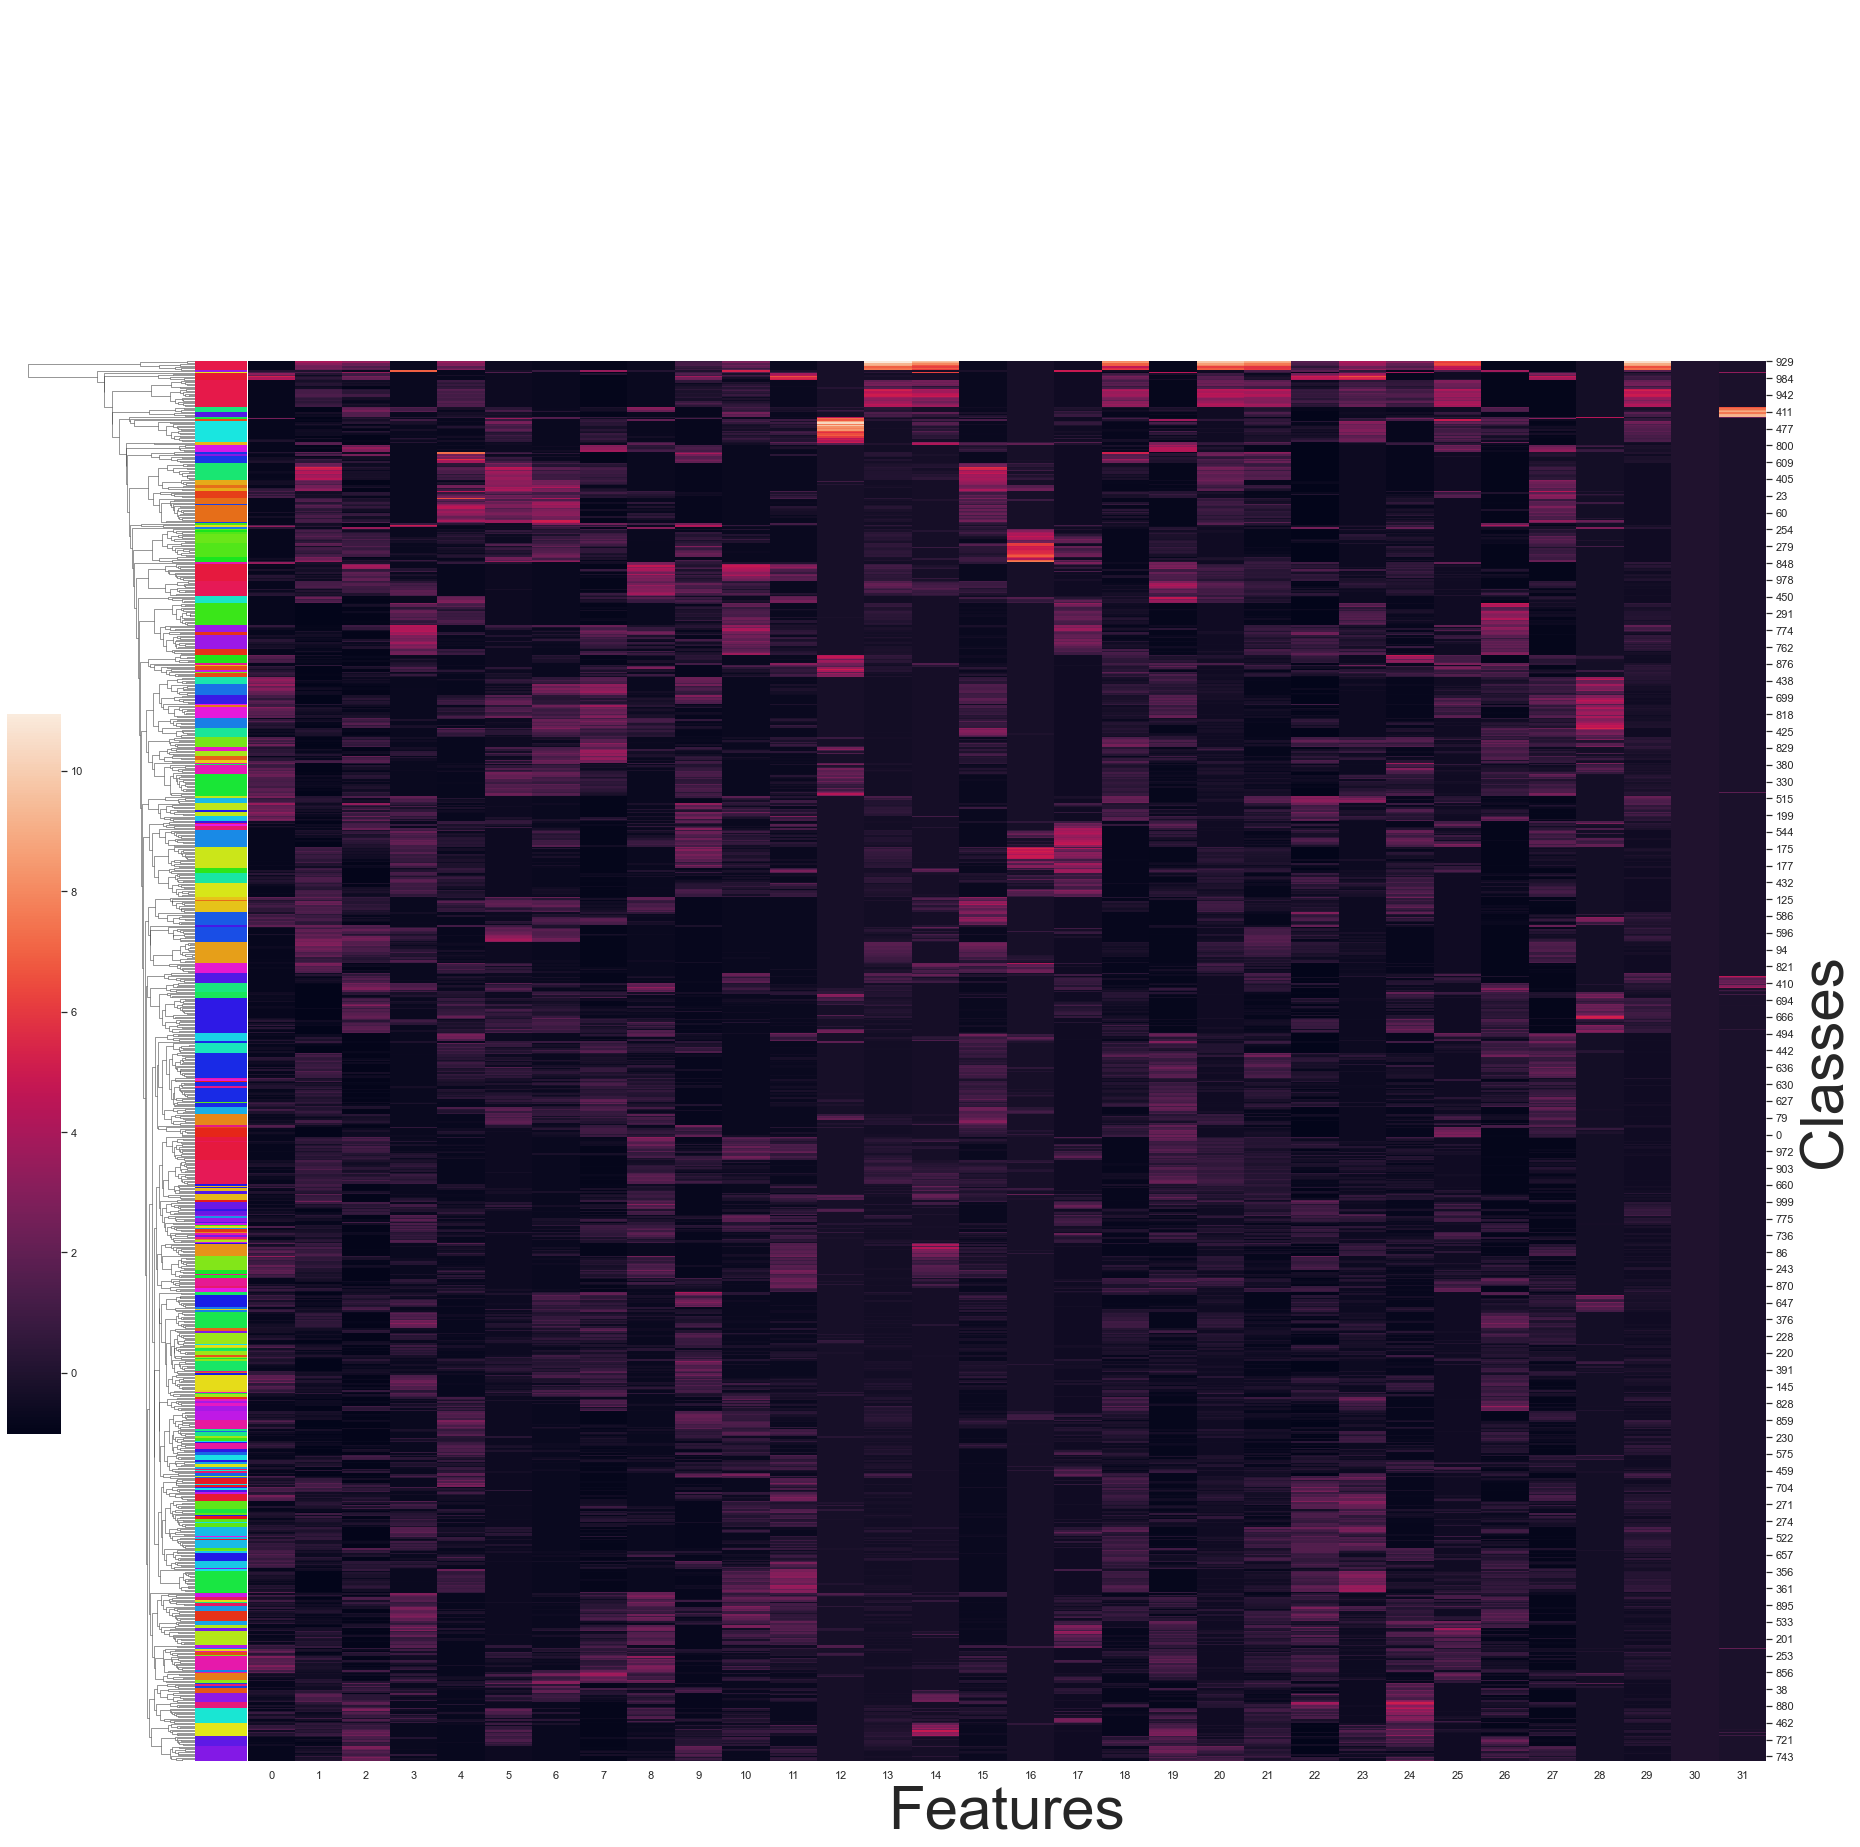

In [62]:
g=sns.clustermap(intermediate, row_cluster=True, col_cluster = False,  row_colors=row_colors.to_numpy(), figsize=(25, 25), 
                dendrogram_ratio=(.1, .2),
                cbar_pos=(0, .2, .03, .4))
g.ax_heatmap.set_xlabel('Features', fontsize = 60)
g.ax_heatmap.set_ylabel('Classes', fontsize = 60)
plt.show()

C:\Users\elsal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(1947.9999999999998, 0.5, 'Classes')

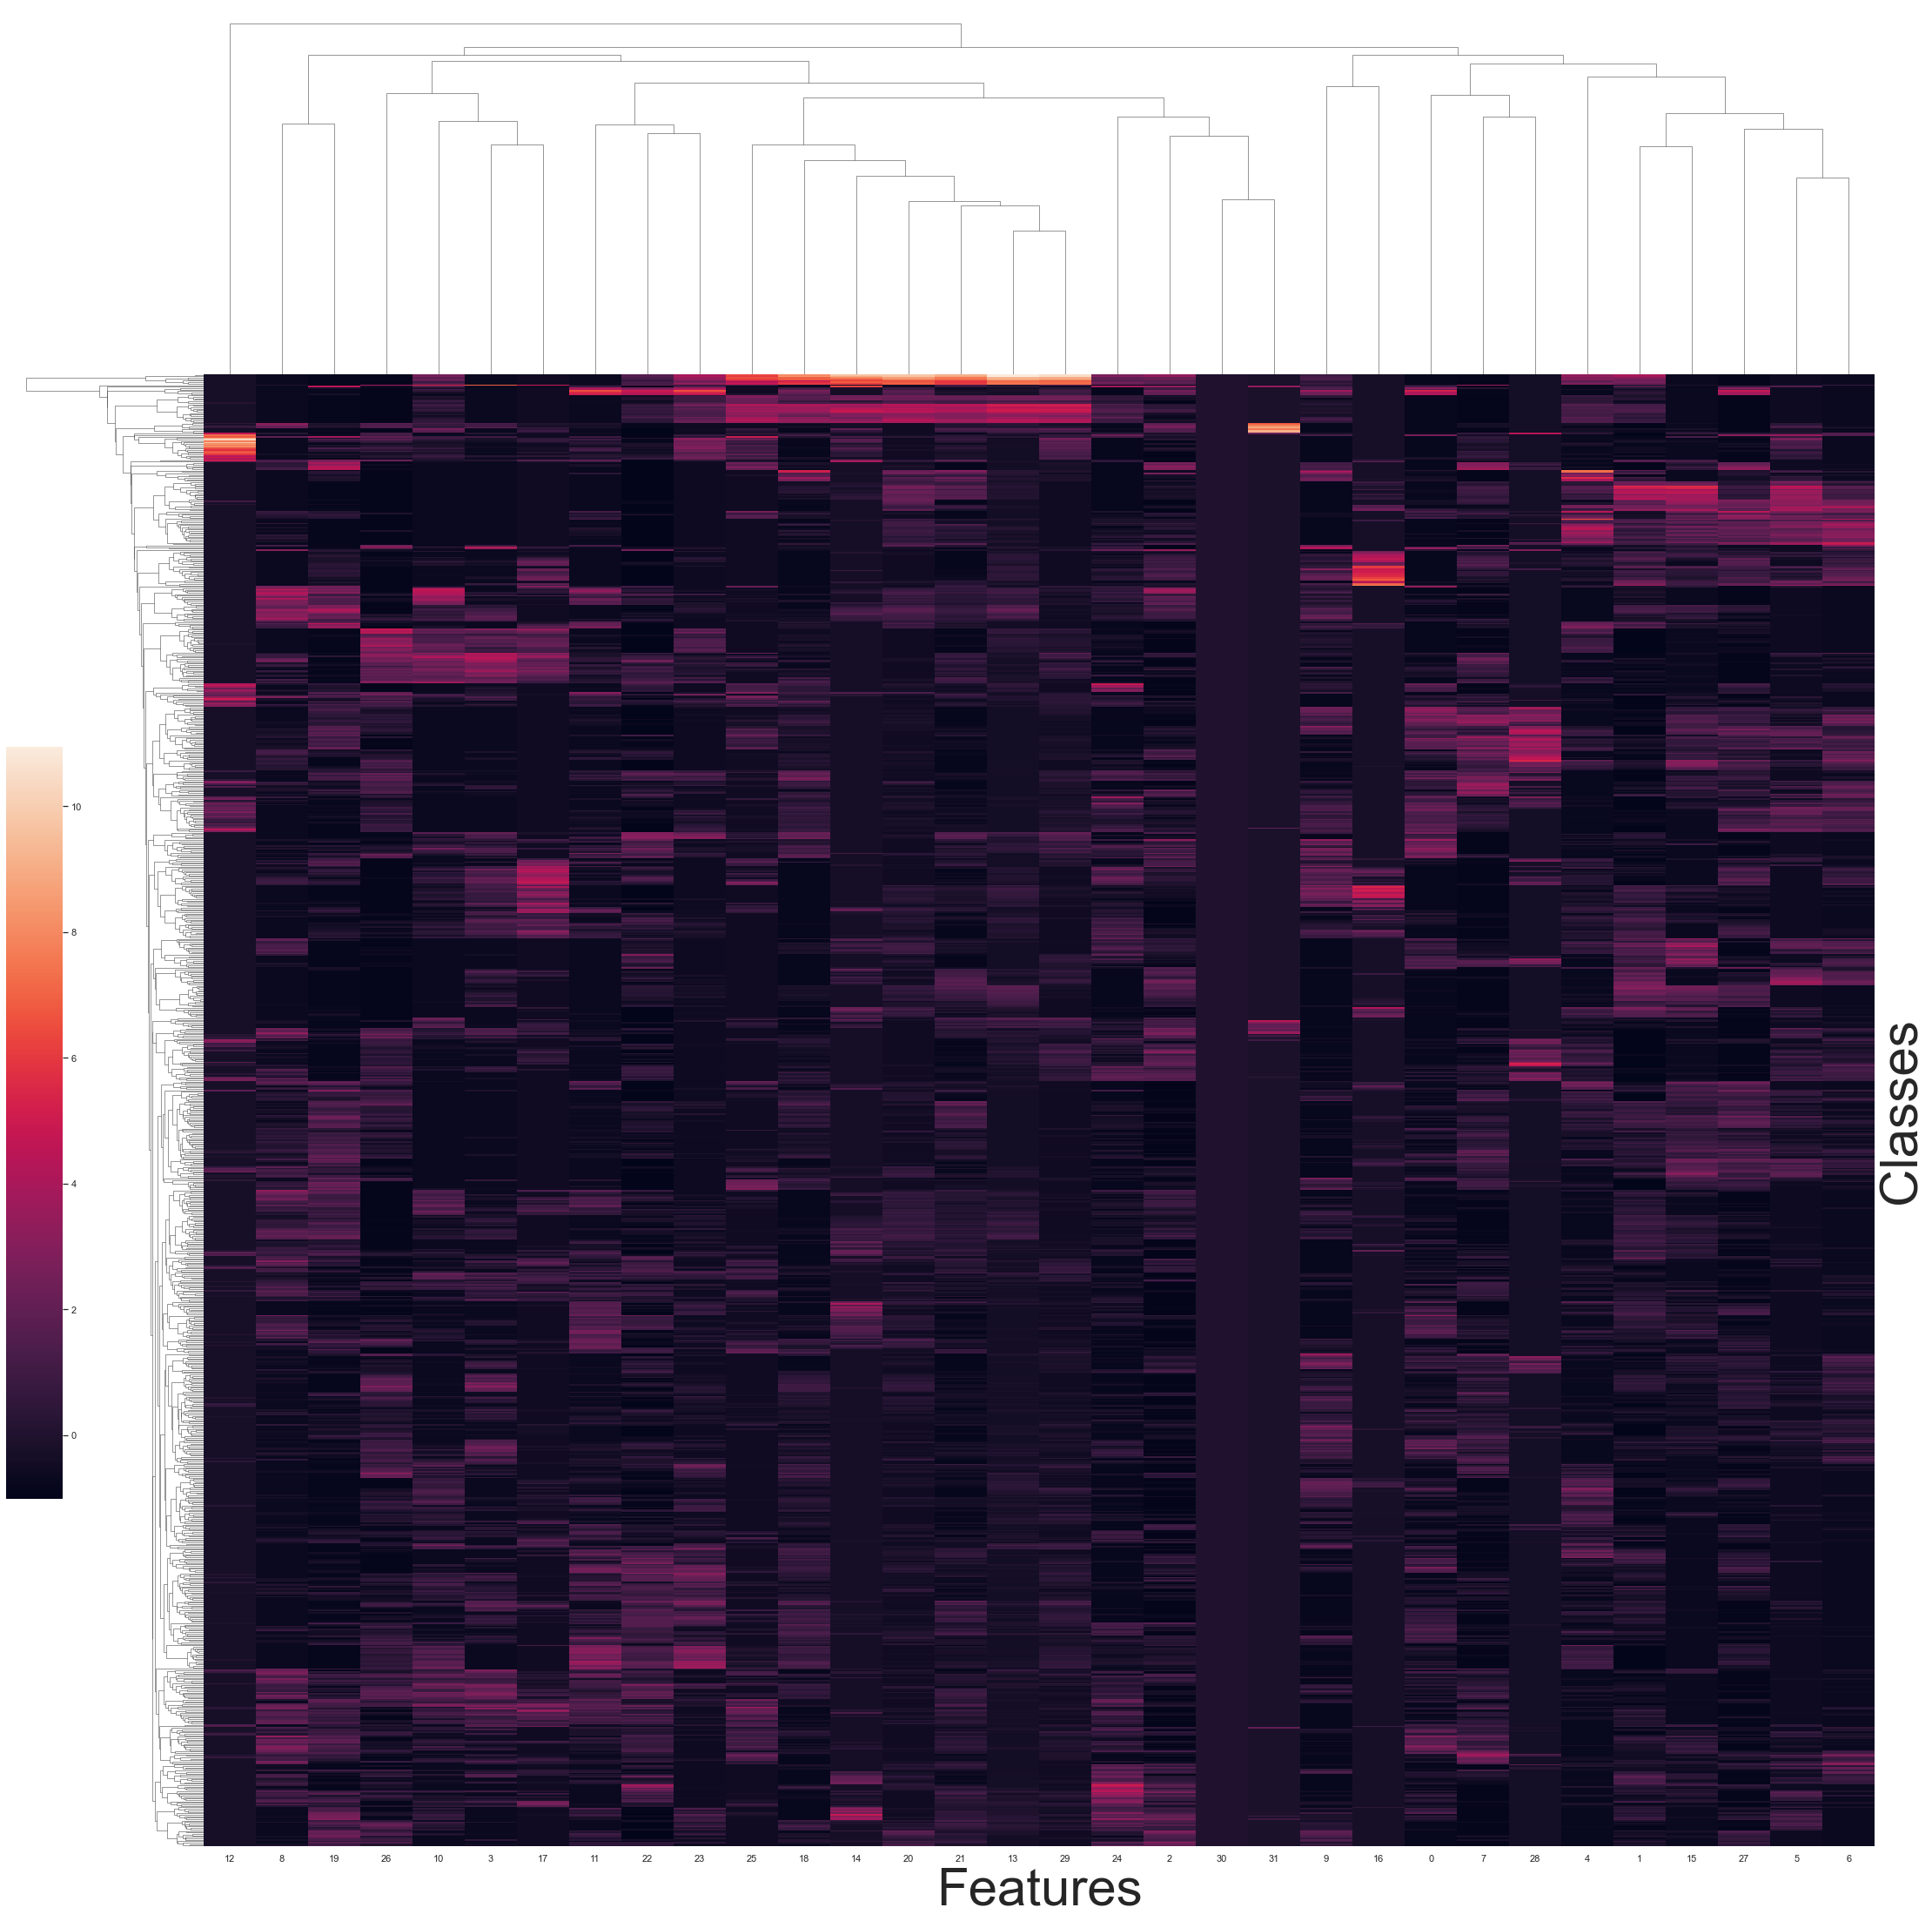

In [57]:
g = sns.clustermap(intermediate,
                   figsize=(30, 30),
                   row_cluster=True,
                   col_cluster=True,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(0, .2, .03, .4),
                   xticklabels=True,
                   yticklabels=False)
g.ax_heatmap.set_xlabel('Features', fontsize = 60)
g.ax_heatmap.set_ylabel('Classes', fontsize = 60)
#plt.setp(g.ax_heatmap.get_yticklabels(), rotation=90)


In [42]:
pca = PCA(n_components=16)
pca_result_layer = pca.fit_transform(intermediate_output)

Text(0.5, 1.0, 'PCA')

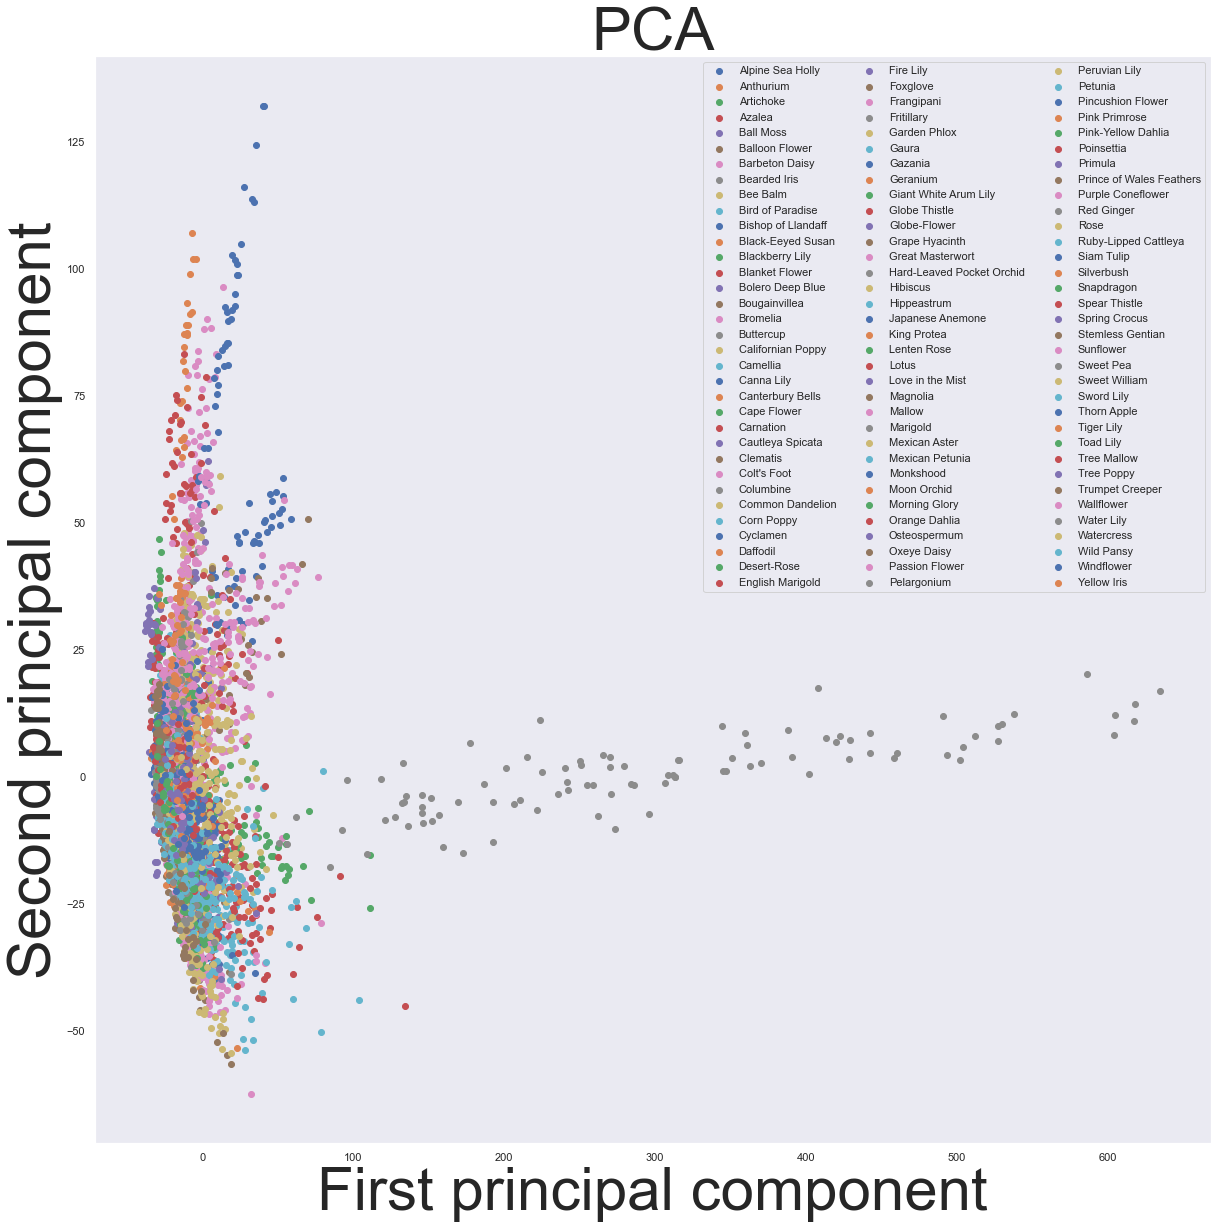

In [43]:
visualize_scatter(pca_result_layer[:,[0,1]], label_ids)
plt.xlabel('First principal component',  fontsize = 60)
plt.ylabel('Second principal component',  fontsize = 60)
plt.title('PCA',  fontsize = 60)

In [44]:
tsne = TSNE(n_components=2)
tsne_result_layer = tsne.fit_transform(pca_result_layer)
tsne_result_scaled_layer = StandardScaler().fit_transform(tsne_result_layer)

Text(0.5, 1.0, 'tsne plot')

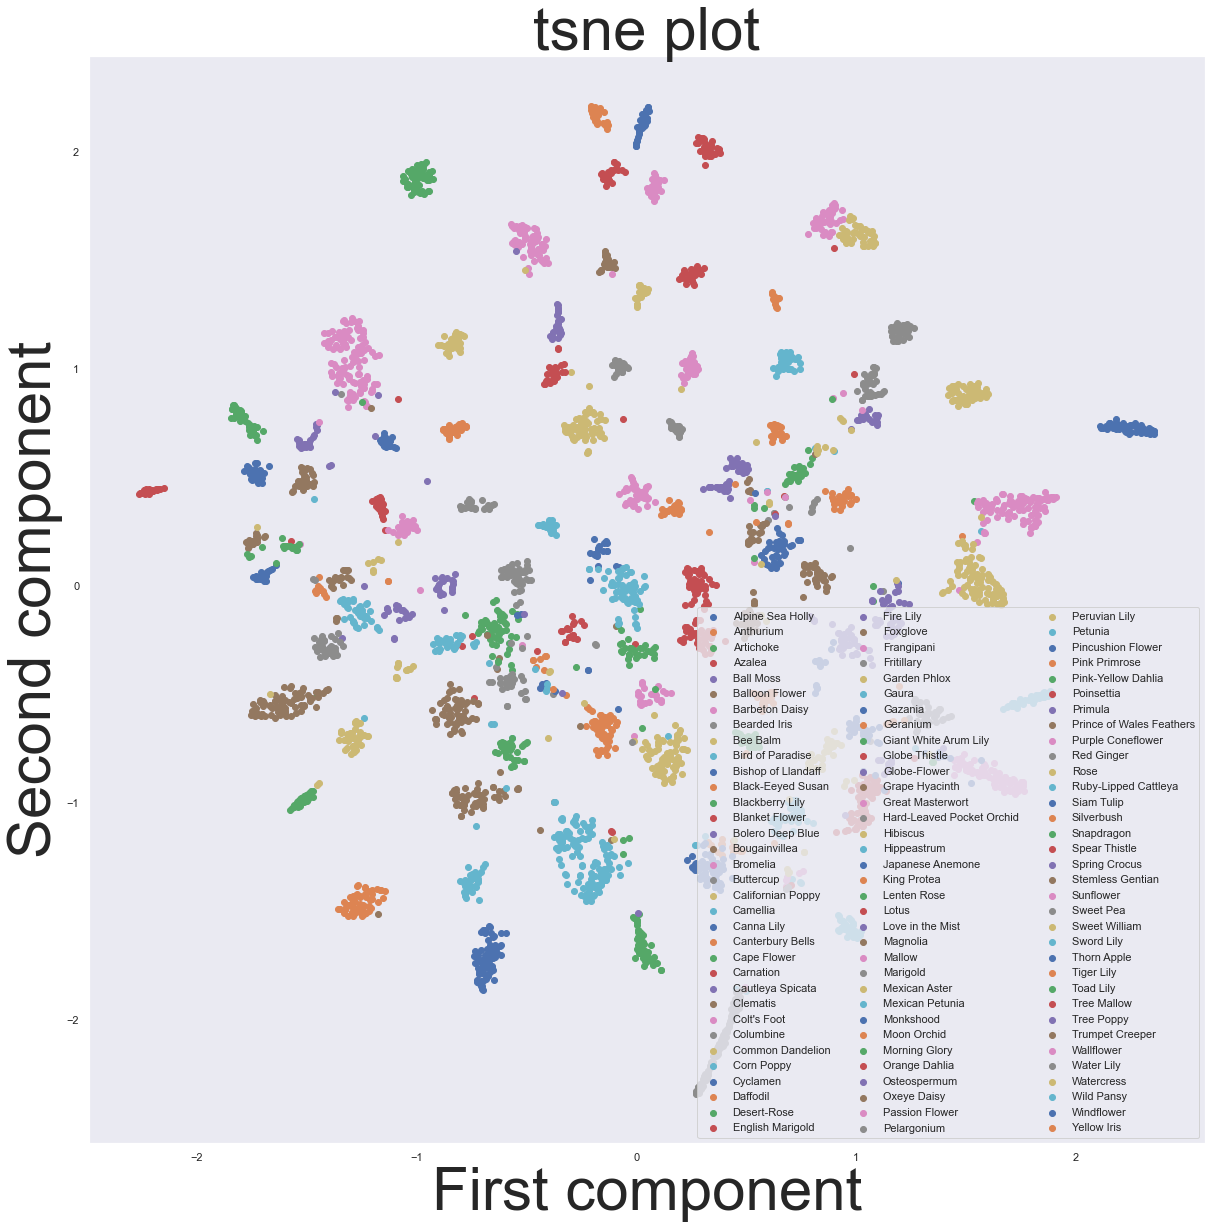

In [45]:
visualize_scatter(tsne_result_scaled_layer, label_ids)
plt.xlabel('First component', fontsize = 60)
plt.ylabel('Second component', fontsize = 60)
plt.title('tsne plot',  fontsize = 60)

In [47]:
# mask = ((-1.4 <  tsne_result_scaled_layer[:,0]) & (tsne_result_scaled_layer[:,0] < -0.6) & (1.3 <  tsne_result_scaled_layer[:,1]) & (tsne_result_scaled_layer[:,1] < 2.5)) 
#np.shape(tsne_result_scaled_layer[mask])

In [48]:
#visualize_scatter(tsne_result_scaled_layer[mask], label_ids[mask])
#plt.title('Zoom in the circle')
#plt.xlabel('First component, tsne')
#plt.ylabel('Second component, tsne')

In [49]:
'''
indices = np.where(mask)
circle_images = X_TRAIN[indices]
len(circle_images)
'''

'\nindices = np.where(mask)\ncircle_images = X_TRAIN[indices]\nlen(circle_images)\n'

In [50]:
'''
number_of_images_to_show = len(circle_images)

images = circle_images

fig, _axs = plt.subplots(nrows=22, ncols=10, figsize=(30,30))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
axs = _axs.flatten()

for i in range(220):
    img = images[i]
    axs[i].imshow(img)
    axs[i].set_axis_off()

plt.show()
'''

'\nnumber_of_images_to_show = len(circle_images)\n\nimages = circle_images\n\nfig, _axs = plt.subplots(nrows=22, ncols=10, figsize=(30,30))\nfig.subplots_adjust(hspace=0.1, wspace=0.1)\naxs = _axs.flatten()\n\nfor i in range(220):\n    img = images[i]\n    axs[i].imshow(img)\n    axs[i].set_axis_off()\n\nplt.show()\n'

## Scoring the results
### Load the challenge metric

**The metric chosen for your challenge** is identified in the "metric.txt" file found in the `scoring_program/` directory.
<br> 
The function "get_metric" searches first for a metric having that name in my_metric.py, then in libscores.py, then in sklearn.metric.


In [ ]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)
# Uncomment the next line to display the code of the scoring metric
#??scoring_function

Using scoring metric: f1_score


## Training performance

In [ ]:
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_TRAIN, Y_hat_train))
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_TRAIN, Y_TRAIN))

print('Test score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_TEST, Y_hat_test))

Training score for the f1_score metric = 0.3832
Ideal score for the f1_score metric = 1.0000
Test score for the f1_score metric = 0.1955


You can add here other scores and result visualization.

## Confusion matrix

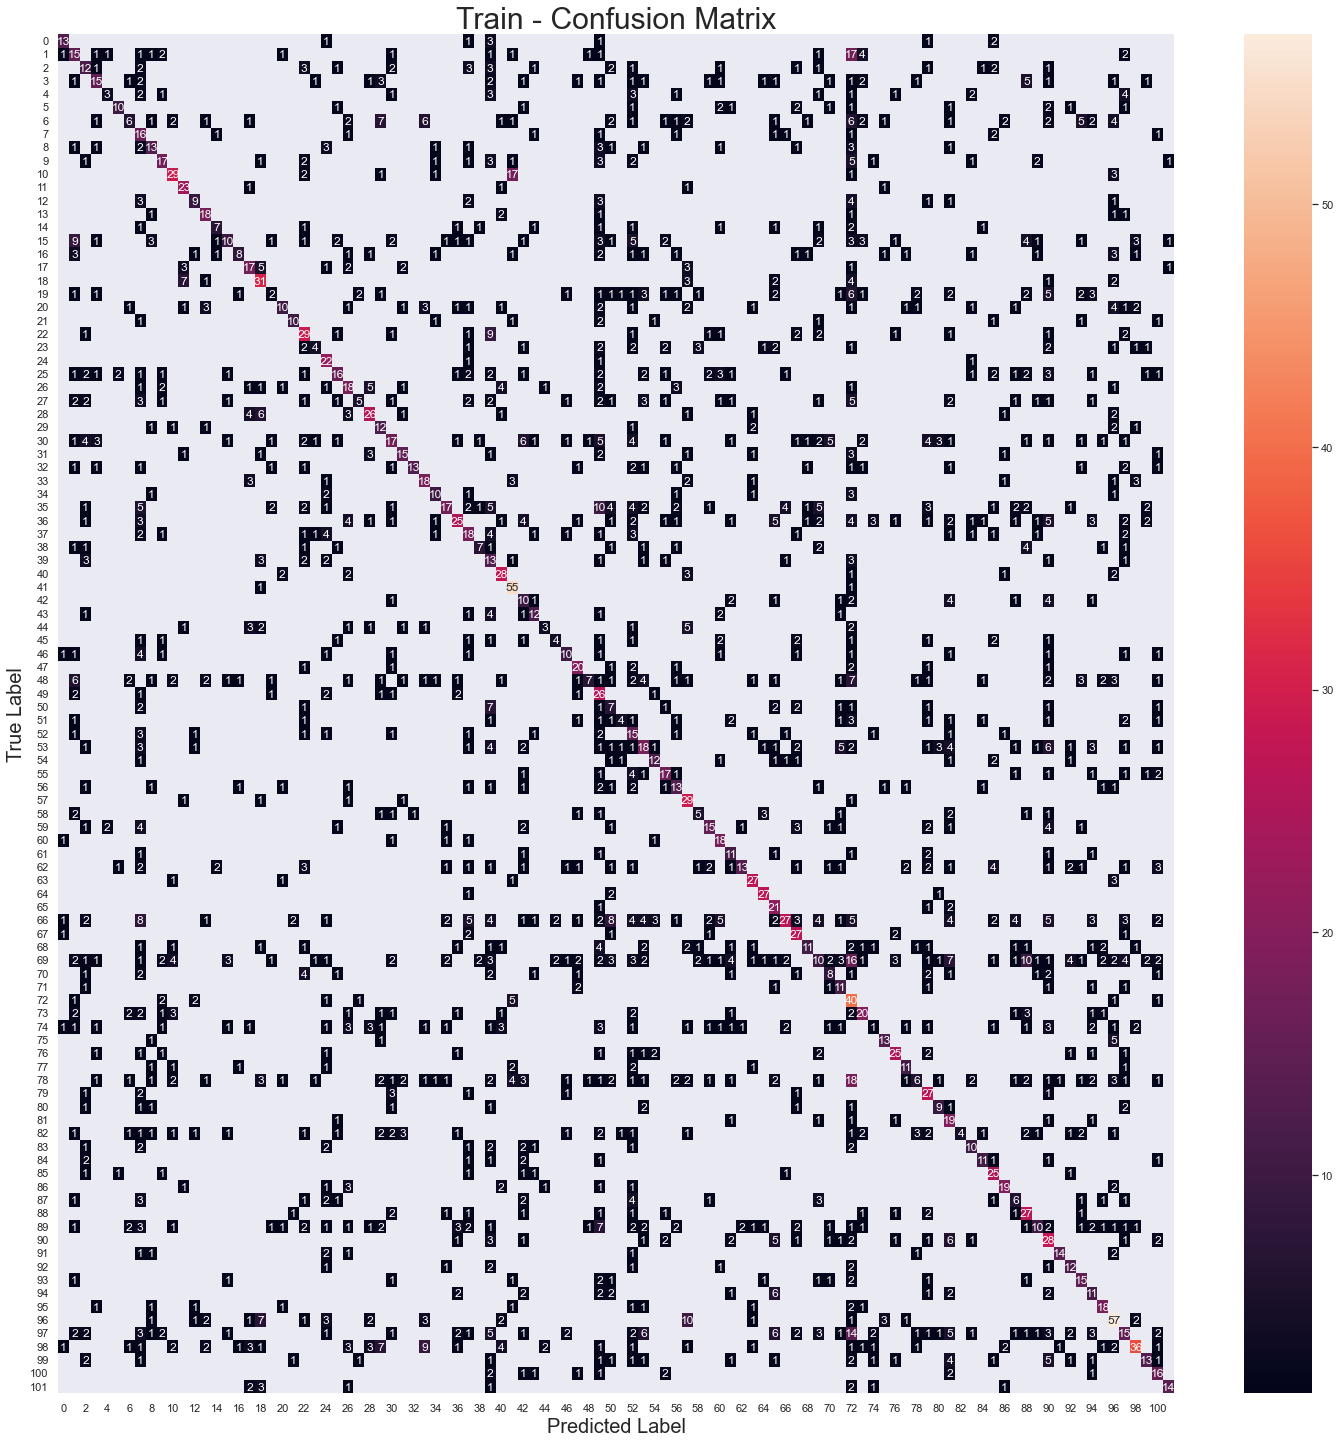

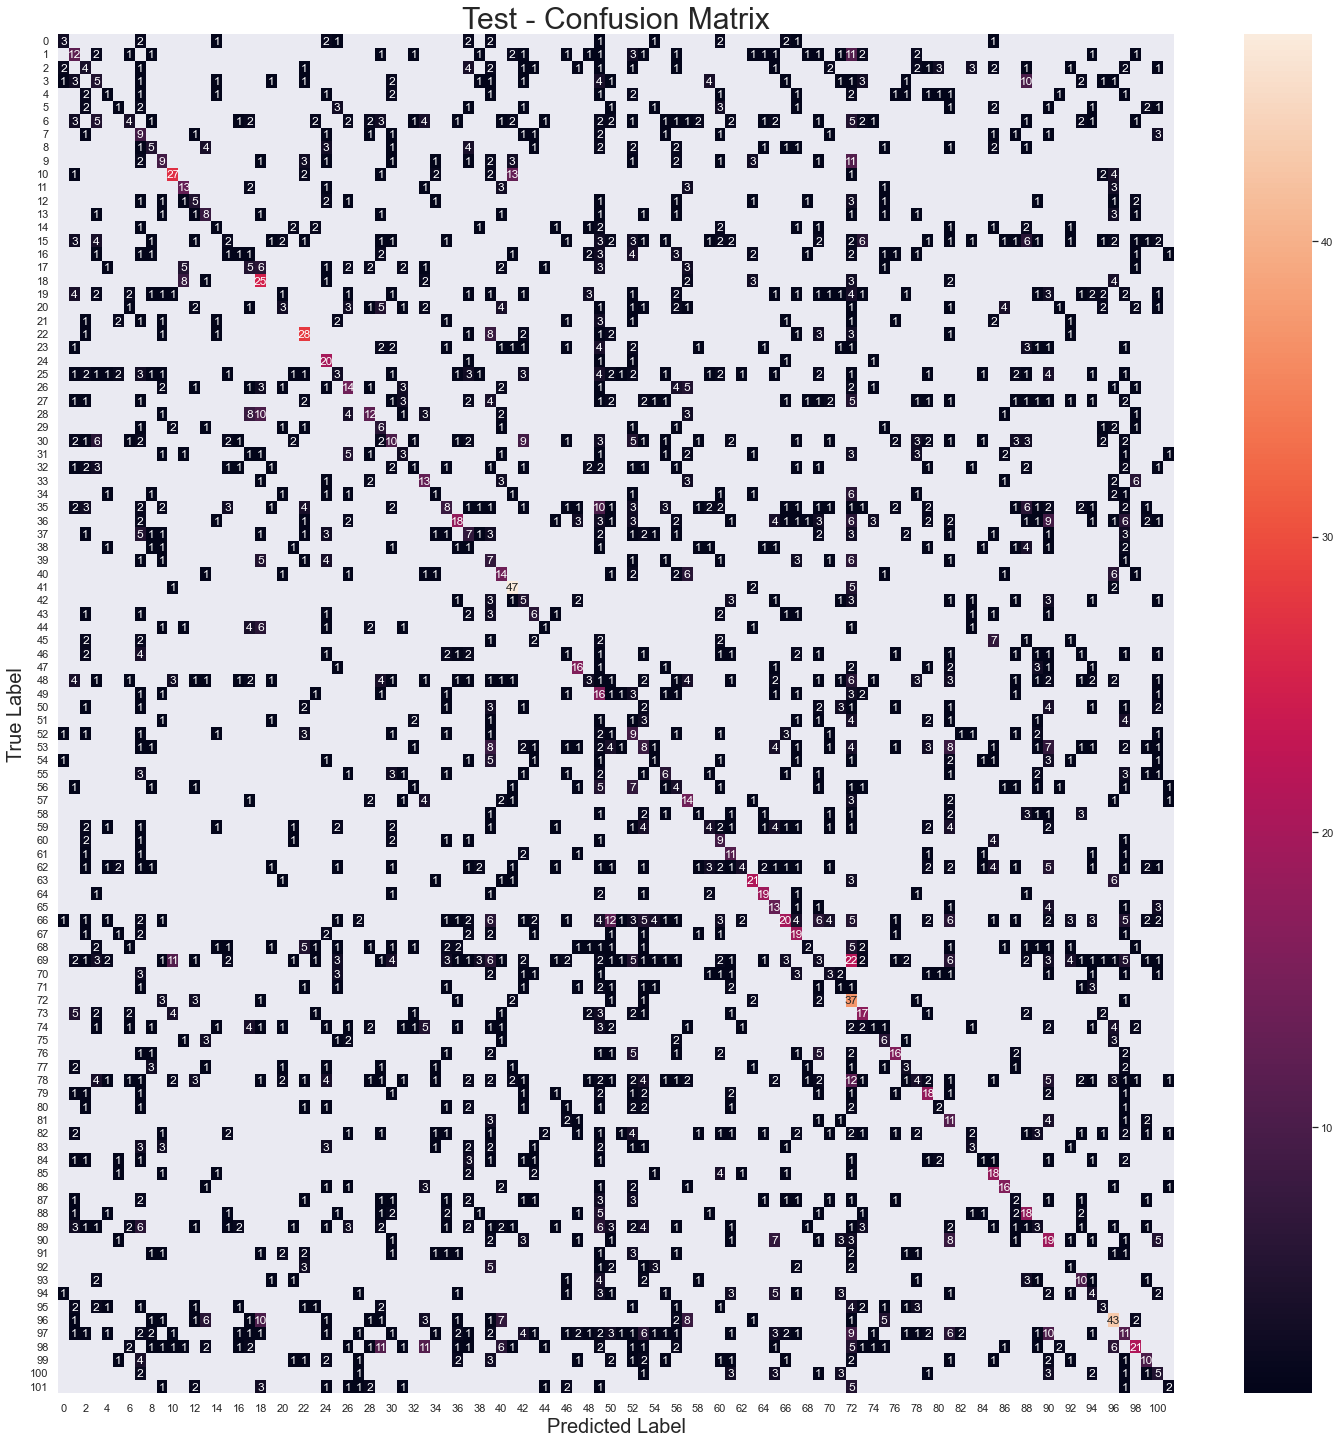

In [ ]:
from sklearn.metrics import confusion_matrix

for y, y_hat, name in [(Y_TRAIN, Y_hat_train, "Train"), (Y_TEST, Y_hat_test, "Test")]:
    confusion_mat = confusion_matrix(y, y_hat).astype('float')
    confusion_mat[confusion_mat == 0] = np.nan
    fig, ax = plt.subplots(figsize=(25, 25))

    df_cm = pd.DataFrame(confusion_mat, range(confusion_mat.shape[0]), range(confusion_mat.shape[1]))
    sns.heatmap(df_cm, annot=True)
    plt.title(name + " - Confusion Matrix", fontsize=30)
    ax.set_ylabel('True Label', fontsize=20)
    ax.set_xlabel('Predicted Label', fontsize=20)
    plt.show()

## Cross-validation performance

CV scores on sample_data doesn't have enough data, and so isn't meaningful.
Run it with the full data to see meaningful values.

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
scores = cross_val_score(myModel, X_TRAIN, Y_TRAIN, cv=3, scoring=make_scorer(scoring_function))
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

FIT: dim(X)= [2729, 49152]
FIT: dim(y)= [2729, 1]
PREDICT: dim(X)= [1365, 49152]
PREDICT: dim(y)= [1365, 1]
FIT: dim(X)= [2729, 49152]
FIT: dim(y)= [2729, 1]
PREDICT: dim(X)= [1365, 49152]
PREDICT: dim(y)= [1365, 1]
FIT: dim(X)= [2730, 49152]
FIT: dim(y)= [2730, 1]
PREDICT: dim(X)= [1364, 49152]
PREDICT: dim(y)= [1364, 1]

CV score (95 perc. CI): 0.18 (+/- 0.02)


***
# Step 3: Making a submission

## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 
<br>
Keep the sample code simple.<br>

<code>python3</code> is required for this step

In [ ]:
# !source activate python3; 
!python $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

Using input_dir: c:\Users\elsal\GitHub\PACHAMAMA\starting_kit\public_data
Using output_dir: c:\Users\elsal\GitHub\PACHAMAMA\starting_kit\sample_result_submission
Using program_dir: c:\Users\elsal\GitHub\PACHAMAMA\starting_kit\ingestion_program
Using submission_dir: c:\Users\elsal\GitHub\PACHAMAMA\starting_kit\sample_code_submission
Data name: flower_challenge

========== Ingestion program version 6 ==========

************************************************
******** Processing dataset Flower_challenge ********
************************************************
========= Reading and converting data ==========
###-------------------------------------###
### Checking Data
###-------------------------------------###


-------------------------------------
[+] Your dataset is in perfect format
-------------------------------------


###-------------------------------------###
### Loading Data
###-------------------------------------###


-------------------------------------
[+] Data loaded 

### Test scoring program

In [ ]:
scoring_output_dir = 'scoring_output'
# !source activate deeplearning; 
!python $score_dir/score.py $data_dir $result_dir $scoring_output_dir

###-------------------------------------###
### Using metric :  f1_score
###-------------------------------------###


###-------------------------------------###
### Total solutions :  8189
### Train solutions :  4094
### Test solutions :  4095
###-------------------------------------###


###-------------------------------------###
### Solutions files are ready!
###-------------------------------------###


======= Set 1 (Flower_challenge_train): f1_score(set1_score)=0.166838091944 =======
======= Set 2 (Flower_challenge_test): f1_score(set2_score)=0.160643140800 =======


# Prepare the submission

In [ ]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = '../sample_code_submission_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
print("Submit this file to codalab:\n" + sample_code_submission)

Submit this file to codalab:
../sample_code_submission_22-01-22-17-55.zip
